<img src="IMG/logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales - Segundo Cuatrimestre 2025

# TS7: Transformada Z y Respuesta en frecuencia
#### Matías Cassino 

# Consignas

Dado las siguientes ecuaciones en diferencias de los siguientes sistemas, que representan un filtro de media móvil: 

a) $y(n)=x(n−3)+x(n−2)+x(n−1)+x(n)$
 

b) $y(n)=x(n−4)+x(n−3)+x(n−2)+x(n−1)+x(n)$
 

c)  $y(n)=x(n)−x(n−1)$
 

d)  $y(n)=x(n)−x(n−2)$
 

Se pide:

1) Hallar $T(z)=\frac{Y(z)}{X(z)}$.
    
2) Calcular su respuesta en frecuencia de módulo y fase.

3) Simular y validar la respuesta en frecuencia de todos los sistemas con Numpy.



# Introducción

En este trabajo se analizan diversas ecuaciones en diferencias finitas no recursivas a través de la transformada Z con el propósito de obtener sus funciones de transferencia y comprender sus respuestas en módulo y fase.

# Desarrollo experimental

In [6]:
#%% Módulos

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sig
from matplotlib import patches

#%% Funciones

plt.close('all')

def rta_mod_y_fase(b,a,worN,funcion,fs):
    w,h=sig.freqz(b,a,worN=worN,fs=fs) 
    phase=np.unwrap(np.angle(h)) 
    plt.figure()
    # Magnitud
    plt.subplot(2,1,1)
    #plt.plot(w, 20*np.log10(abs(h)),label=funcion)
    plt.plot(w, abs(h),label=funcion)
    plt.title('Respuesta en Magnitud')
    plt.xlabel('Frecuencia [rad/muestra]')
    plt.ylabel('|H(jω)|')
    plt.grid(True, which='both', ls=':')
    plt.legend()

    # Fase
    plt.subplot(2,1,2)
    plt.plot(w, phase,label=funcion)
    plt.title('Fase')
    plt.xlabel('Frecuencia [rad/muestra]')
    plt.ylabel('Fase [rad]')
    plt.grid(True, which='both', ls=':')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    return w, h, phase

#%% Coeficientes de las funciones transferencia y parámetros
b_a=[1,1,1,1]
a_a=[1]

b_b=[1,1,1,1,1]
a_b=[1]

b_c=[1,-1]
a_c=[1]

b_d=[1,0,-1]
a_d=[1]

funcion=['Ta(Z)','Tb(Z)','Tc(Z)','Td(Z)']
worN=None
fs=np.pi*2

# Análisis de resultados

1. Se considera la expresión $A_0 \, y(n) = \sum_{i=0}^{N-1} B_i \, x(n - i) - \sum_{i=1}^{N-1} A_i \, y(n - i)$ donde $A_i=0$ y $A_0=1$, y luego se transforma según $Y(z)=\sum_{n=0}^{N-1} y(n) \, z^{-n}$.

In [4]:
from IPython.display import IFrame
IFrame("IMG/Consigna_1_TS7.pdf", width=1000, height=1000)

2. Con el objetivo de obtener la respuesta de módulo y fase se pondera la igualdad $z = r \, e^{-j\Omega }$ donde, particularmente en estos casos, $r=1$ y se toma el valor medio para así reescribir las funciones transferencia mediante el producto de exponenciales y funciones trigonométricas, tales como el seno y coseno. En consecuencia, se opera algebraicamente sobre la parte real e imaginaria de la expresión.
Cabe destacar que los gráficos de fase sin envoltura resultan en funciones lineal decrecientes hasta $π$; no obstante, se optó por representarlos con envoltura a fin de contrastarlos con las respuestas devueltas por Numpy.

In [2]:
from IPython.display import IFrame
IFrame("IMG/Consigna_2_TS7.pdf", width=1000, height=1000)

3. Se constatan las respuestas de módulo y fase graficadas mediante las representaciones de las funciones de Numpy donde, fundamentalmente, se evidencia el efecto escalón en la fase derivado de los cruces por cero en el módulo. También, en las respuestas de fase se exponen las pendientes lineales decrecientes correspondientes a cada caso, y las respuestas de módulo indican el carácter pasa bajos de $T_a(z)$ y $T_b(z)$ y la naturaleza pasa altos de $T_c(z)$ y  pasa banda de $T_d(z)$.

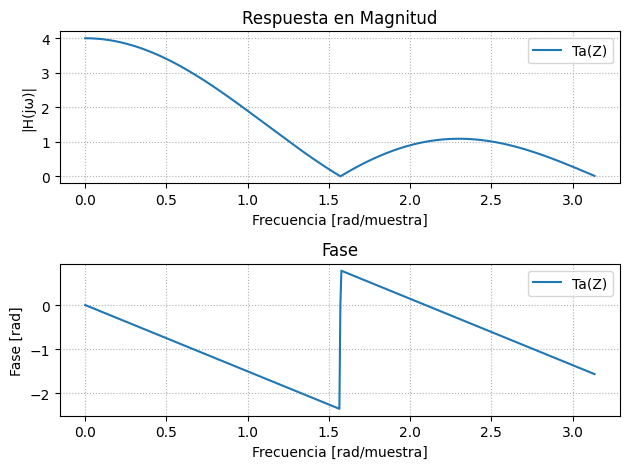

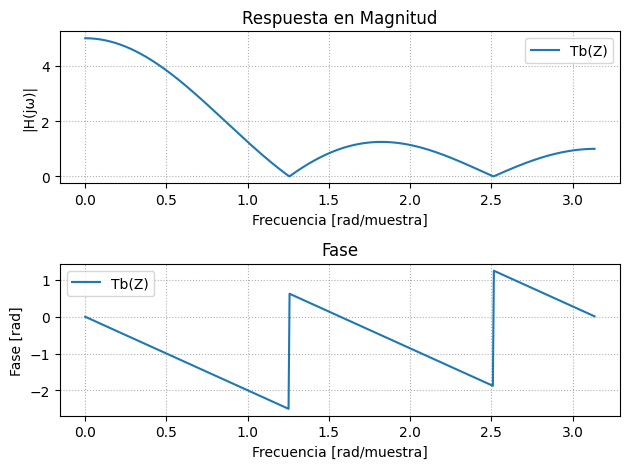

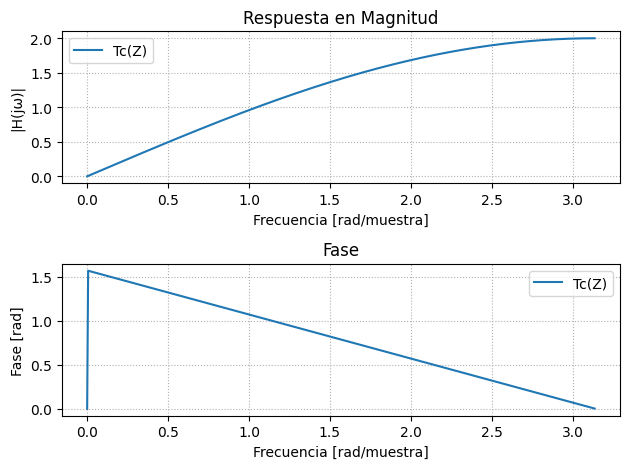

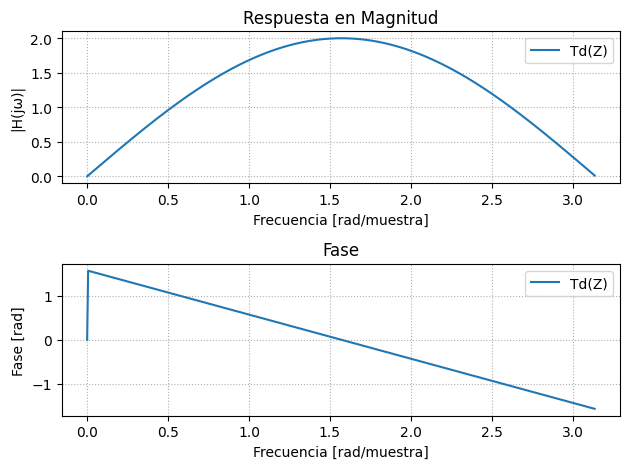

In [7]:
#%% RTA de módulo y de fase
w_ta,h_ta,phase_ta=rta_mod_y_fase(b=b_a,a=a_a,worN=worN,funcion=funcion[0],fs=fs)
w_tb,h_tb,phase_tb=rta_mod_y_fase(b=b_b,a=a_b,worN=worN,funcion=funcion[1],fs=fs)
w_tc,h_tc,phase_tc=rta_mod_y_fase(b=b_c,a=a_c,worN=worN,funcion=funcion[2],fs=fs)
w_td,h_td,phase_td=rta_mod_y_fase(b=b_d,a=a_d,worN=worN,funcion=funcion[3],fs=fs)

# Conclusiones

Finalmente, se deduce que la transformada z es adecuada para el análisis de filtros digitales ya que asume un dominio finito para series causales y periódico 2$π$ en espectro. Además, al poseer un radio variable comprende tanto el régimen transitorio como el estacionario, lo cual permite estudiar su respuesta en ambos estados. Sin embargo, en este caso, al tener radio unitario se analiza para cada función transferencia la respuesta en frecuencia de módulo y fase durante el régimen estacionario. En efecto, la representación gráfica permite comprender el tipo de filtro y parámetros tales como la atenuación en banda.

# Autoevaluación
A) Sí, resolví la tarea con seguridad.

B) Lo aprendido en esta tarea fueron la capacidad de obtener la función transferencia asociada a una ecuación en diferencias finitas mediante la transformada Z, y el proceso de análisis su respuesta de módulo y fase a partir de la frecuencia.

C) No fue utilizada ninguna IA.